##### Loan  data 


#####  File Reading / data  ingetion

In [1]:
import pandas as pd
import  numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path  =  r"C:\Users\admin\Downloads\train_loan.xlsx"

In [4]:
df  =  pd.read_excel(path)

### Basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [6]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [10]:
##  drop  id  columnp('id' , axis  =  1 , inplace  =  True)

df.drop('id' , axis  =  1  ,  inplace  = True)

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

#### Seperate X and  Y

In [11]:
x  =  df.drop('loan_status' , axis  = 1)
y  =  df['loan_status']

In [12]:
type(y)

pandas.core.series.Series

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [14]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3


In [15]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

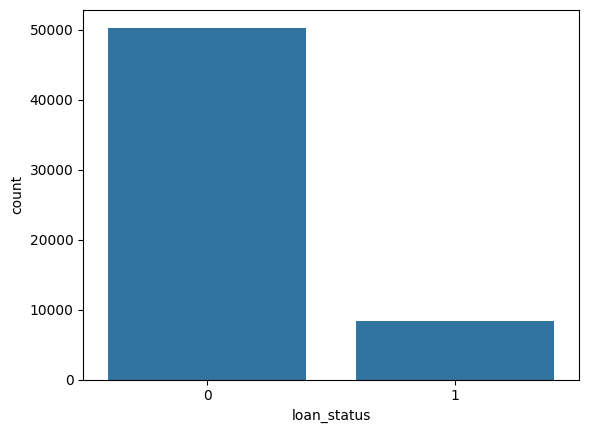

In [16]:
sns.barplot(y.value_counts())

### seperate num and  Cat  data

In [17]:
cat  =  x.columns[x.dtypes  =='object']
num  = x.columns[x.dtypes  !='object']

In [18]:
print(cat)
print()
print(num)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


#### create  pipeline

In [19]:
from sklearn.pipeline  import Pipeline
from sklearn.compose  import ColumnTransformer
from  sklearn.impute import SimpleImputer
from  sklearn.preprocessing  import StandardScaler  , OrdinalEncoder

In [20]:
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  = 'mean')) ,  
 ('scaler' ,  StandardScaler())])

cat_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy =  'most_frequent'   )) ,
 ('encoder' ,  OrdinalEncoder())]) 
 

In [21]:
# combine  pipelines
pre  =  ColumnTransformer([('num' ,  num_pipeline  ,  num) ,  
                ('cat' , cat_pipeline  , cat )])

In [22]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [23]:
#  apply on data
x_scaled  =  pre.fit_transform(x)


In [24]:
x_scaled

array([[ 1.56620019, -0.7657678 , -1.18719967, ...,  1.        ,
         1.        ,  0.        ],
       [-0.92005729, -0.21212778,  0.32804728, ...,  3.        ,
         2.        ,  0.        ],
       [ 0.2401962 , -0.92922343,  0.8331296 , ...,  4.        ,
         0.        ,  0.        ],
       ...,
       [-0.75430679, -0.52849351,  0.58058844, ...,  1.        ,
         3.        ,  0.        ],
       [-0.92005729, -0.89758686, -0.68211735, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5716972 ,  0.28878463, -0.68211735, ...,  5.        ,
         1.        ,  0.        ]], shape=(58645, 11))

In [25]:
#  dataframe
x_scaled =  pd.DataFrame(x_scaled ,  
                        columns  =  pre.get_feature_names_out())

In [26]:
x_scaled.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,3.0,1.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,2.0,3.0,2.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,2.0,4.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,3.0,5.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,3.0,3.0,0.0,0.0


### train  test  split

In [27]:
from  sklearn.model_selection import train_test_split

In [28]:
x_train ,  x_test  ,  y_train  ,  y_test  =  train_test_split(x_scaled  ,  y  , 
                                                 test_size  =  0.2  ,  random_state  = 34)

In [29]:
print(x_train.shape  ,  y_train.shape  )
print(x_test.shape  ,  y_test.shape)

(46916, 11) (46916,)
(11729, 11) (11729,)


In [30]:
x_train.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length', 'cat__person_home_ownership',
       'cat__loan_intent', 'cat__loan_grade',
       'cat__cb_person_default_on_file'],
      dtype='object')

In [31]:
x_train.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
18913,0.571697,-0.581221,-0.429576,-0.290731,1.849336,0.226440,1.039036,3.0,4.0,3.0,0.0
3827,0.571697,2.266070,-1.187200,1.039305,0.379654,-0.646056,1.039036,0.0,3.0,1.0,0.0
44372,0.240196,-0.106673,-0.177035,0.500101,-0.572673,0.444564,1.039036,3.0,1.0,0.0,0.0
11495,-0.257055,-0.075036,1.338212,1.039305,1.411067,0.553626,-0.698298,0.0,3.0,3.0,1.0
40004,0.074446,-0.264855,-0.429576,1.937978,1.130971,2.298617,0.790845,3.0,0.0,3.0,0.0


In [32]:
y_train.head()

18913    1
3827     0
44372    0
11495    1
40004    1
Name: loan_status, dtype: int64

In [33]:
x_test.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership,cat__loan_intent,cat__loan_grade,cat__cb_person_default_on_file
15457,1.897701,-0.106673,-0.682117,-0.218837,1.002456,-0.318870,2.776370,0.0,0.0,2.0,0.0
34452,-0.422806,-0.549585,-0.177035,-0.039102,2.007508,0.553626,-0.946489,3.0,3.0,3.0,1.0
48321,-0.257055,-0.765768,0.328047,-0.758041,1.411067,-0.209808,-0.946489,3.0,0.0,3.0,0.0
16924,1.068949,1.079699,-0.682117,1.039305,2.633605,-0.209808,1.039036,0.0,4.0,5.0,1.0
34605,0.240196,-0.330765,2.348377,-0.218837,1.628554,0.008316,0.294464,0.0,0.0,3.0,0.0


In [34]:
y_test.head()

15457    0
34452    1
48321    1
16924    0
34605    1
Name: loan_status, dtype: int64

### fit  models

In [35]:
from  sklearn.linear_model import LogisticRegression
from  sklearn.tree  import DecisionTreeClassifier
from  sklearn.ensemble  import RandomForestClassifier
from  sklearn.ensemble  import GradientBoostingClassifier
import xgboost  
from  xgboost import XGBClassifier
from  sklearn.svm  import SVC
from  sklearn.neighbors import KNeighborsClassifier


In [36]:
%pip  install  xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
x_train.shape

(46916, 11)

### fit  models

In [39]:
from  sklearn.model_selection  import cross_val_score

In [40]:
LR  =  LogisticRegression()
LR.fit(x_train , y_train)
cvs_LR   =  cross_val_score(LR  ,  x_train ,  y_train  , cv  =  5   )
DT  = DecisionTreeClassifier(max_depth  =  6 )
DT.fit(x_train  , y_train)
cvs_DT   =  cross_val_score(DT  ,  x_train ,  y_train  , cv  =  5   )
RF =  RandomForestClassifier(max_depth  =  6)
RF.fit(x_train  , y_train)
cvs_RF   =  cross_val_score(RF ,  x_train ,  y_train  , cv  =  5   )
GB  =  GradientBoostingClassifier(max_depth  =  6)
GB.fit(x_train ,  y_train)
cvs_GB  =  cross_val_score(GB ,  x_train ,  y_train  , cv  =  5   )
XGB = XGBClassifier(max_depth  =  6) 
XGB.fit(x_train ,  y_train)
cvs_XGB  =  cross_val_score(XGB ,  x_train ,  y_train  , cv  =  5   )
KNN  =  KNeighborsClassifier(7)
KNN.fit(x_train  , y_train)
cvs_KNN  =  cross_val_score(KNN ,  x_train ,  y_train  , cv  =  5   )
svm   =  SVC()
svm.fit(x_train ,  y_train)
cvs_svm  =  cross_val_score(svm,  x_train ,  y_train  , cv  =  5   )


In [41]:
print('cvs_LR ' ,  cvs_LR.mean())
print('cvs_DT ' ,  cvs_DT.mean())
print('cvs_RF ' ,  cvs_RF.mean())
print('cvs_GB ' ,  cvs_GB.mean())
print('cvs_XGB ' ,  cvs_XGB.mean())
print('cvs_KNN ' ,  cvs_KNN.mean())
print('cvs_svm ' ,  cvs_svm.mean())

cvs_LR  0.894577592168238
cvs_DT  0.9462230490850706
cvs_RF  0.9405107471121659
cvs_GB  0.9505286378414318
cvs_XGB  0.9505073136112824
cvs_KNN  0.9295763233447442
cvs_svm  0.9280203450600245


### evaluation of models

In [42]:
from sklearn.metrics  import (classification_report  ,  
confusion_matrix  , f1_score )

In [45]:
def evaluate(model   ,  x , y):
    pred  =  model.predict(x)
    f1 =  f1_score(y ,  pred , average  = 'macro')
    cr  =  classification_report(y  , pred)
    cf  =  confusion_matrix(y ,  pred)

    cv  =  cross_val_score( model  , x ,  y ,  n_jobs= -1 , scoring= 'f1_macro' , cv  =  5 )
    
    print('cv' ,  cv.mean())
    print(f'f1-->{f1}')
    print(cr)
    print(sns.heatmap(cf  ,  annot  = True  , fmt  = 'd'))

### logistic  regression evaluation

cv 0.7360304844423653
f1-->0.7362037827812249
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     40197
           1       0.73      0.42      0.53      6719

    accuracy                           0.89     46916
   macro avg       0.82      0.70      0.74     46916
weighted avg       0.88      0.89      0.88     46916

Axes(0.125,0.11;0.62x0.77)


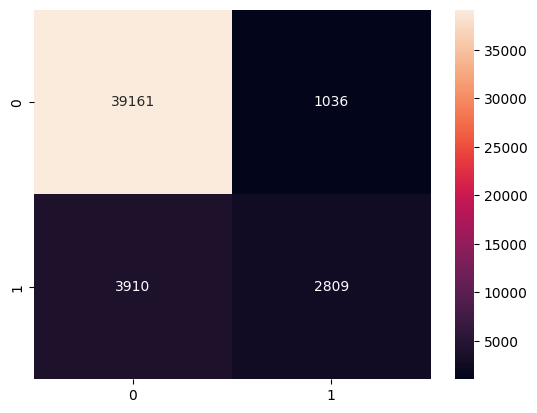

In [46]:
evaluate(LR  , x_train  ,  y_train)

cv 0.7449444605081623
f1-->0.7473206461774047
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10098
           1       0.72      0.45      0.55      1631

    accuracy                           0.90     11729
   macro avg       0.82      0.71      0.75     11729
weighted avg       0.89      0.90      0.89     11729

Axes(0.125,0.11;0.62x0.77)


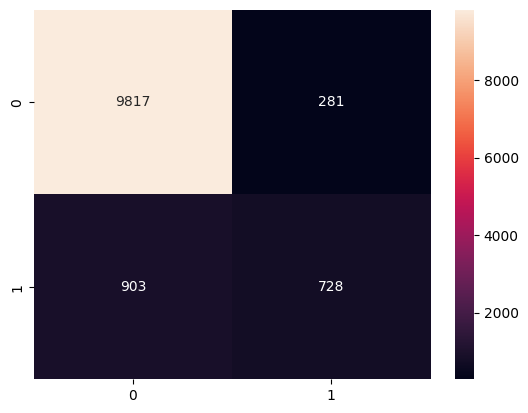

In [47]:
#  test  evaluation 
evaluate(LR  ,  x_test  ,  y_test)

##  DT  

cv 0.8754591147420815
f1-->0.8780817749956977
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40197
           1       0.95      0.67      0.79      6719

    accuracy                           0.95     46916
   macro avg       0.95      0.83      0.88     46916
weighted avg       0.95      0.95      0.94     46916

Axes(0.125,0.11;0.62x0.77)


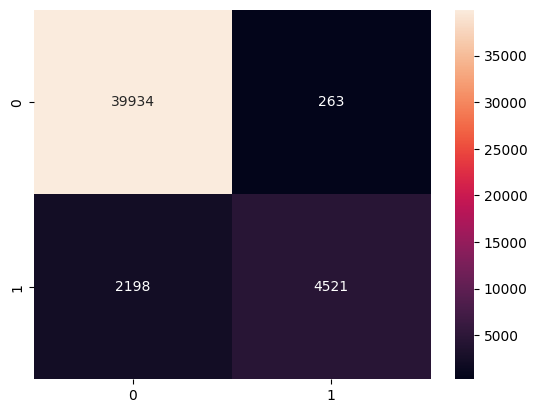

In [48]:
evaluate(DT  ,  x_train  ,  y_train)

cv 0.8725608692347752
f1-->0.8808039788515171
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10098
           1       0.94      0.68      0.79      1631

    accuracy                           0.95     11729
   macro avg       0.95      0.84      0.88     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


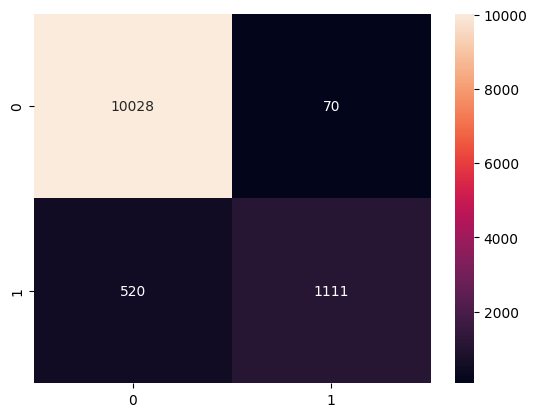

In [61]:
evaluate(DT  ,  x_test , y_test)

## GB

cv 0.8895786767553598
f1-->0.9121537327107612
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     40197
           1       0.95      0.76      0.85      6719

    accuracy                           0.96     46916
   macro avg       0.96      0.88      0.91     46916
weighted avg       0.96      0.96      0.96     46916

Axes(0.125,0.11;0.62x0.77)


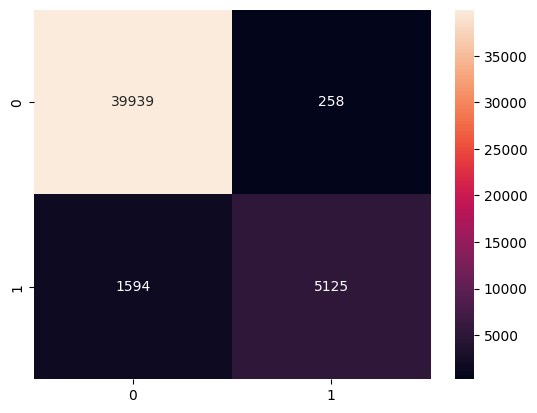

In [49]:
evaluate(GB  , x_train  ,  y_train)

cv 0.88566305651545
f1-->0.8911306742290779
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10098
           1       0.92      0.72      0.81      1631

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


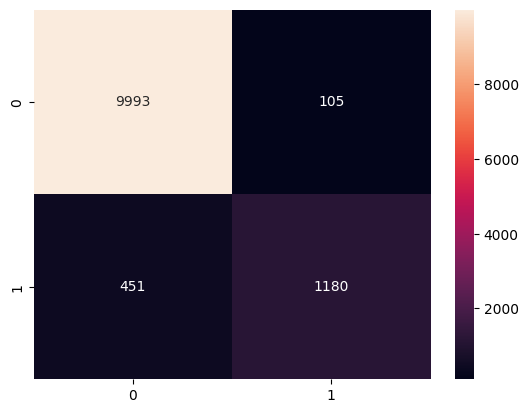

In [50]:
evaluate(GB  ,  x_test  , y_test)

### XGB  evaluation

cv 0.8900719976662629
f1-->0.9266091062443738
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40197
           1       0.96      0.80      0.87      6719

    accuracy                           0.97     46916
   macro avg       0.96      0.90      0.93     46916
weighted avg       0.97      0.97      0.97     46916

Axes(0.125,0.11;0.62x0.77)


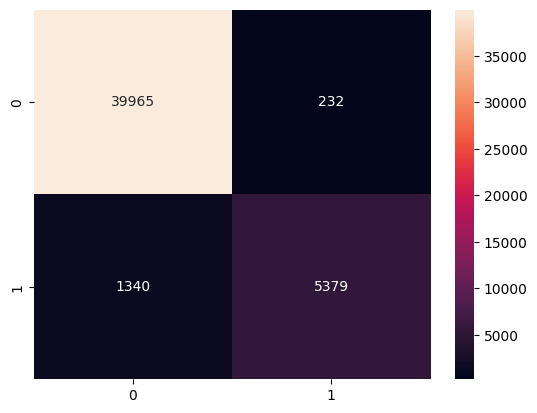

In [51]:
evaluate(XGB  ,  x_train  , y_train)

cv 0.8880199855416363
f1-->0.8953882154275827
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10098
           1       0.91      0.74      0.82      1631

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.90     11729
weighted avg       0.95      0.95      0.95     11729

Axes(0.125,0.11;0.62x0.77)


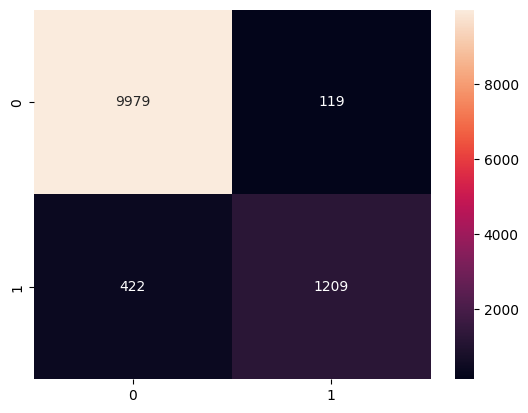

In [52]:
evaluate(XGB ,x_test  ,  y_test  )

####  KNN

cv 0.838275477200337
f1-->0.8660335259160512
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40197
           1       0.89      0.67      0.77      6719

    accuracy                           0.94     46916
   macro avg       0.92      0.83      0.87     46916
weighted avg       0.94      0.94      0.94     46916

Axes(0.125,0.11;0.62x0.77)


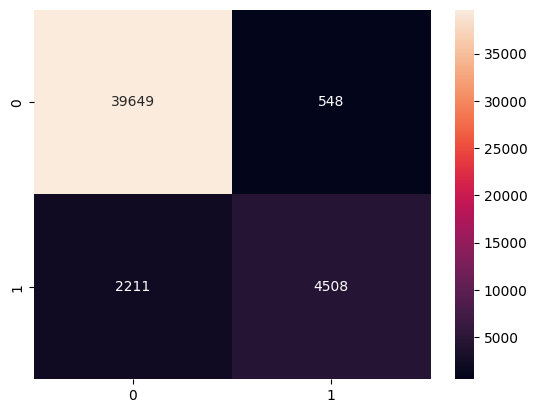

In [53]:
evaluate(KNN , x_train  , y_train)

cv 0.8079132773353356
f1-->0.8492114849097594
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10098
           1       0.84      0.65      0.74      1631

    accuracy                           0.93     11729
   macro avg       0.89      0.82      0.85     11729
weighted avg       0.93      0.93      0.93     11729

Axes(0.125,0.11;0.62x0.77)


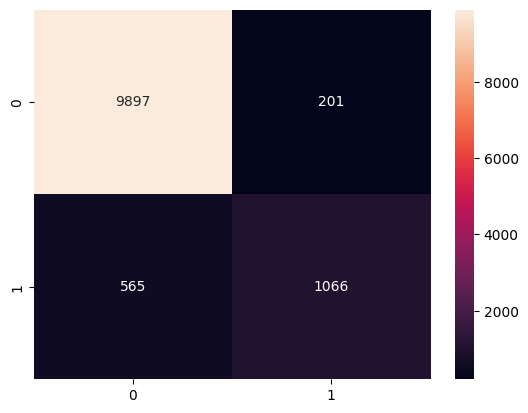

In [55]:
evaluate(KNN , x_test  ,  y_test)

### SVM

cv 0.8305347660547078
f1-->0.8380349287489703
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     40197
           1       0.87      0.61      0.72      6719

    accuracy                           0.93     46916
   macro avg       0.91      0.80      0.84     46916
weighted avg       0.93      0.93      0.93     46916

Axes(0.125,0.11;0.62x0.77)


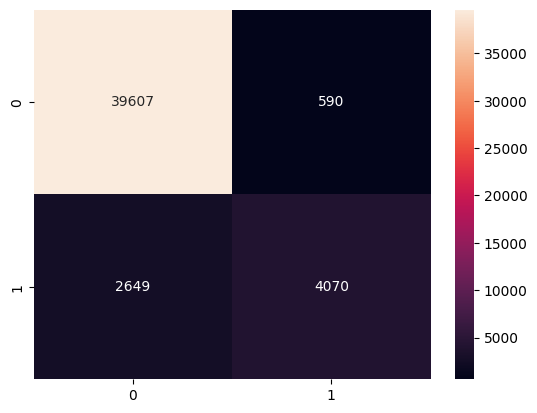

In [56]:
evaluate(svm  ,  x_train ,  y_train)

cv 0.8126174083310808
f1-->0.8388277811855966
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10098
           1       0.85      0.62      0.72      1631

    accuracy                           0.93     11729
   macro avg       0.90      0.80      0.84     11729
weighted avg       0.93      0.93      0.93     11729

Axes(0.125,0.11;0.62x0.77)


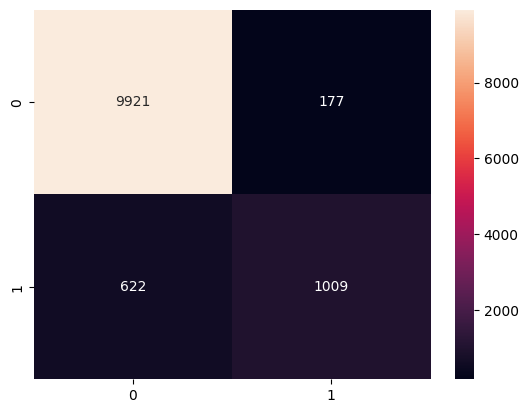

In [57]:
evaluate(svm ,  x_test  ,  y_test)

In [ ]:
#### XGB is  giving  good  performance  .
-  refer  this  model for predictions

##### predict data  for  sample  file

In [58]:
sample =  pd.read_excel(r"C:\Users\admin\Downloads\test_loan.xlsx")

In [59]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [60]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [61]:
sample_scaled  =  pre.fit_transform(sample)

In [62]:
sample_scaled

array([[-0.75700653,  0.13014081, -0.43612143, ...,  2.        ,
         5.        ,  0.        ],
       [-0.25971541,  0.8415031 ,  0.33940391, ...,  4.        ,
         2.        ,  1.        ],
       [-0.25971541, -0.8973825 ,  0.08089546, ...,  5.        ,
         4.        ,  1.        ],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ...,  4.        ,
         0.        ,  0.        ],
       [-0.92277024, -0.73930199, -0.17761298, ...,  4.        ,
         3.        ,  1.        ],
       [ 0.56910312, -0.50218123,  0.33940391, ...,  0.        ,
         1.        ,  0.        ]], shape=(39098, 11))

In [63]:
#  convert  in dataframe
sample_scaled  =  pd.DataFrame(sample_scaled,  
                                 columns  =  pre.get_feature_names_out())


In [64]:
### XGB  model 
pred =  XGB.predict(sample_scaled)

In [66]:
pred

array([1, 0, 1, ..., 0, 0, 1], shape=(39098,))

In [67]:
sample['predictions'] =  pred

In [68]:
sample.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,predictions
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0


In [69]:
a  =  [62  ,  55 , 78  , 89 , 85 ,78  ,      73    ]

In [70]:
np.mean(a)

np.float64(74.28571428571429)

In [71]:
b  =  [28 , 34 , 21  ,  25]
np.mean(b)

np.float64(27.0)